
----- Training Models for All Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Adaptive Boosting Ensemble (All Features) Metrics:
Accuracy: 0.8420787633827777
Precision: 0.8724635258403118
Recall: 0.8420787633827777
F1 Score: 0.8487212365346318


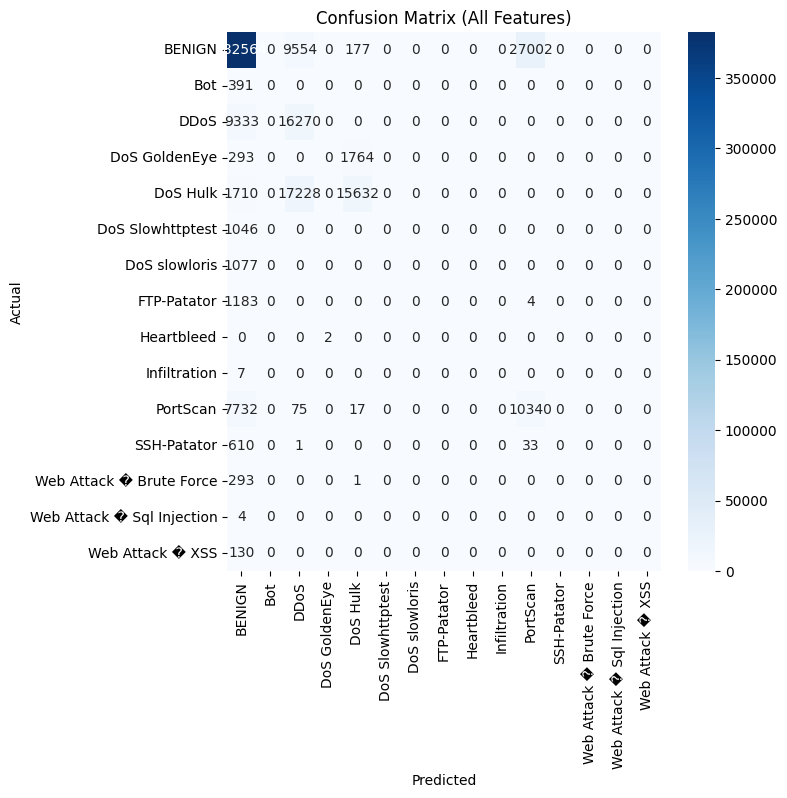


----- Training Models for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Adaptive Boosting Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.8913261958519089
Precision: 0.8072782332481231
Recall: 0.8913261958519089
F1 Score: 0.8464587549746347


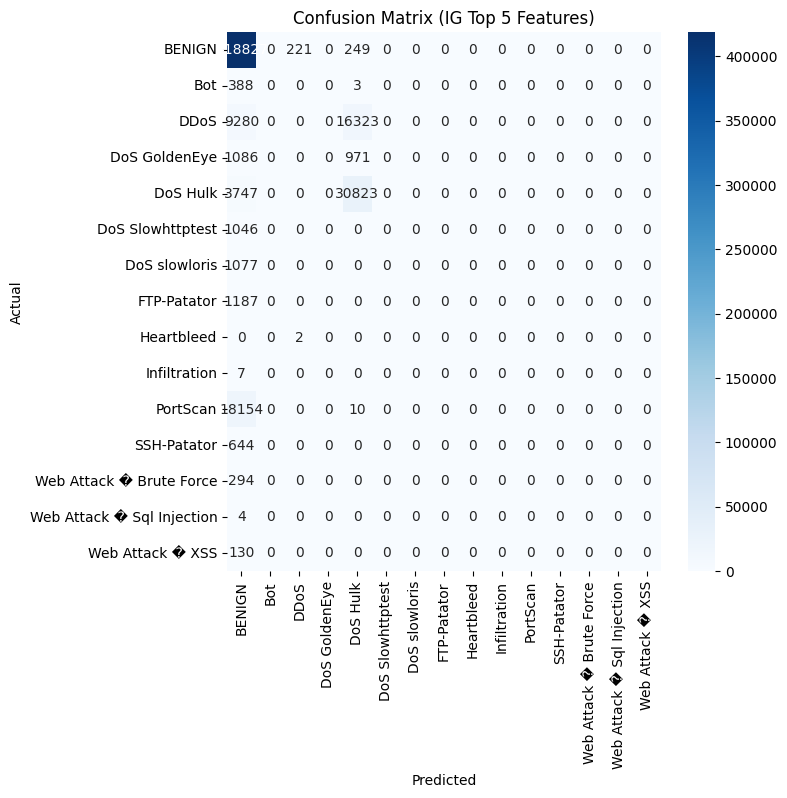


----- Training Models for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Adaptive Boosting Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.891526404782813
Precision: 0.8257435480830054
Recall: 0.891526404782813
F1 Score: 0.8467053929348061


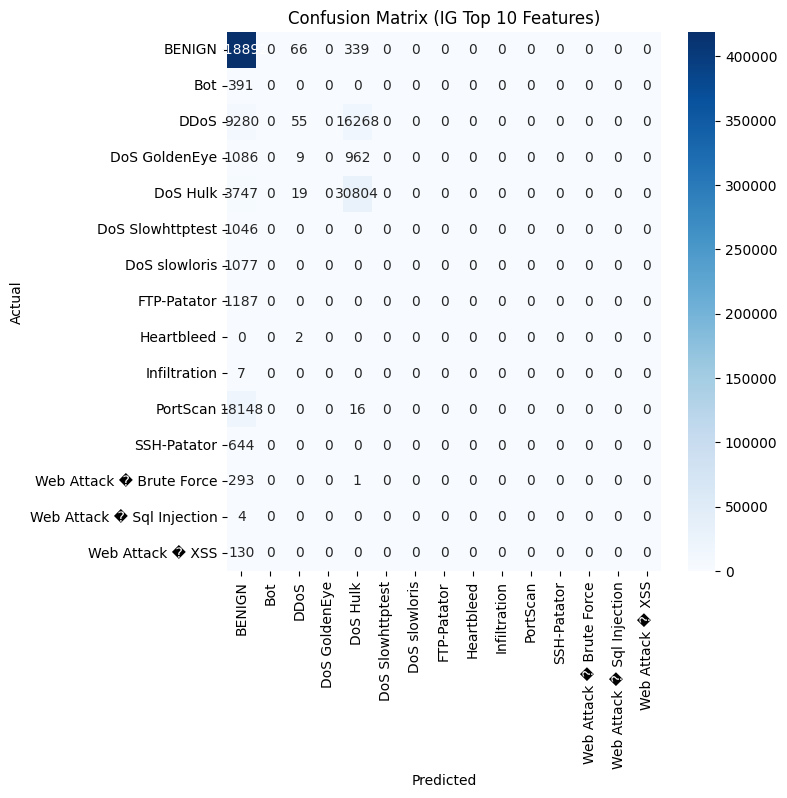


----- Training Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Adaptive Boosting Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9055886043455249
Precision: 0.8598250450962074
Recall: 0.9055886043455249
F1 Score: 0.8747778083097318


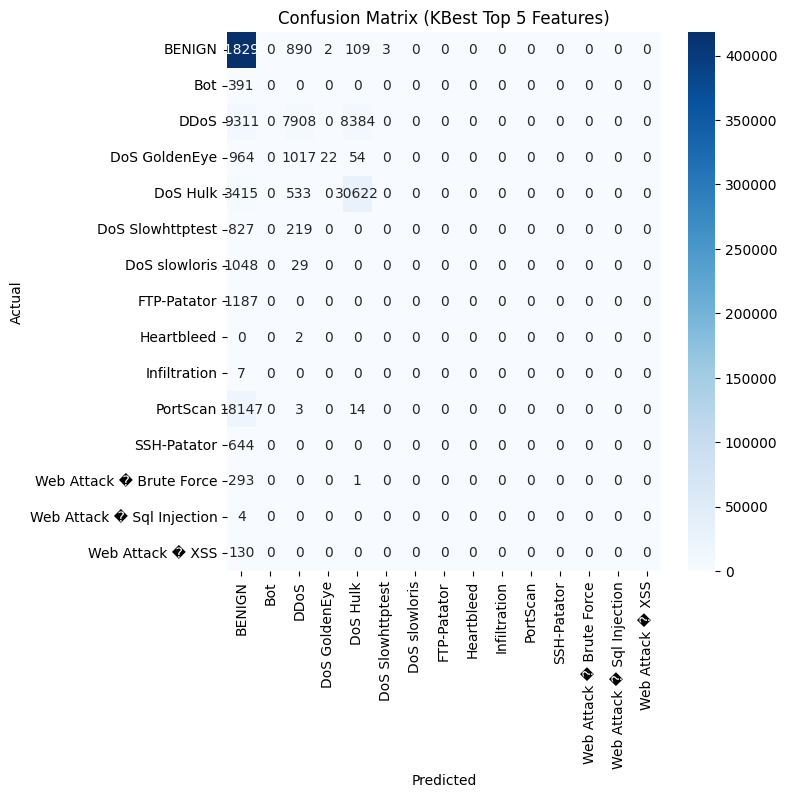


----- Training Models for KBest Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Adaptive Boosting Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9026191689148875
Precision: 0.8528332704487392
Recall: 0.9026191689148875
F1 Score: 0.8696322812300802


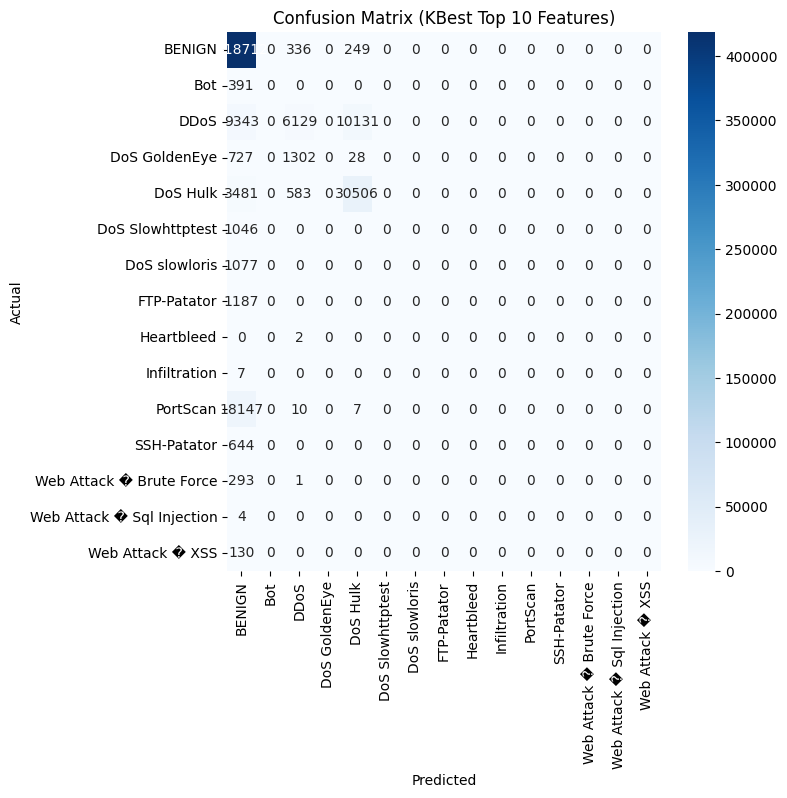

In [1]:
from sklearn.ensemble import AdaBoostClassifier
import time
import numpy as np
import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix


# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Models for {name} -----")

    start_time = time.time()

    AdaB_model = AdaBoostClassifier()

    AdaB_model.fit(X_tr, y_train)
    train_end_time = time.time()

    y_pred_enc = AdaB_model.predict(X_te)
    pred_end_time = time.time()

    metrics = evaluate_model(y_test, y_pred_enc, f"Adaptive Boosting Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, y_pred_enc, le.classes_, f"Confusion Matrix ({name})")


In [2]:

# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("ADA_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                               Model  Accuracy  Precision  \
0          Adaptive Boosting Ensemble (All Features)  0.842079   0.872464   
1     Adaptive Boosting Ensemble (IG Top 5 Features)  0.891326   0.807278   
2    Adaptive Boosting Ensemble (IG Top 10 Features)  0.891526   0.825744   
3  Adaptive Boosting Ensemble (KBest Top 5 Features)  0.905589   0.859825   
4  Adaptive Boosting Ensemble (KBest Top 10 Featu...  0.902619   0.852833   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.842079  0.848721         948.005811             5.494678      953.500489  
1  0.891326  0.846459         102.426980             2.251137      104.678118  
2  0.891526  0.846705         173.904816             2.437989      176.342805  
3  0.905589  0.874778         110.287373             2.309909      112.597282  
4  0.902619  0.869632         194.430488             2.478981      196.909470  
